<a href="https://colab.research.google.com/github/Muh4gus/Prak-AI/blob/main/Tugas_1_prak_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Membaca data
# Contoh data penjualan warung
# Kolom: Nama Barang, Kategori, Harga, Terjual (1=Ya, 0=Tidak)
data = {
    'nama_barang': ['Beras', 'Gula', 'Minyak', 'Teh', 'Kopi'],
    'kategori': ['Sembako', 'Sembako', 'Sembako', 'Minuman', 'Minuman'],
    'harga': [12000, 15000, 20000, 5000, 10000],
    'terjual': [13, 4, 1, 5, 7]
}

# Konversi ke DataFrame
df = pd.DataFrame(data)

# 2. Membersihkan data
# Menghapus data yang mengandung nilai kosong
df.dropna(inplace=True)

# Menghapus data duplikat
df.drop_duplicates(inplace=True)

# Menyimpan data ke file CSV
df.to_csv('data_penjualan_warung.csv', index=False)

In [ ]:
# Preprocessing: Konversi kategori ke angka
kategori_mapping = {category: idx for idx, category in enumerate(df['kategori'].unique())}
df['kategori'] = df['kategori'].map(kategori_mapping)

# 3. Melatih model AI
# Fitur dan label
X = df[['kategori', 'harga']]
y = df['terjual']

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Model Random Forest
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f'Akurasi model: {accuracy * 100:.2f}%')

# Contoh prediksi barang baru
try:
    kategori_minuman = kategori_mapping['Minuman']
except KeyError:
    kategori_minuman = max(kategori_mapping.values()) + 1

barang_baru = pd.DataFrame({'kategori': [kategori_minuman], 'harga': [7000]})
prediksi = model.predict(barang_baru)
print(f'Barang terjual? {"Ya" if prediksi[0] == 1 else "Tidak"}')

df

Akurasi model: 0.00%
Barang terjual? Tidak


,nama_barang,kategori,harga,terjual
0,Beras,0,12000,13
1,Gula,0,15000,4
2,Minyak,0,20000,1
3,Teh,1,5000,5
4,Kopi,1,10000,7


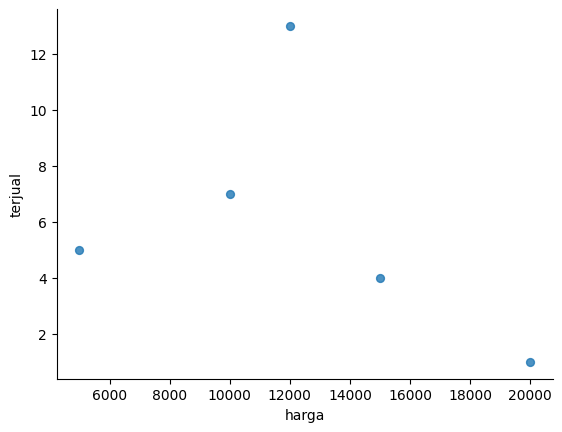

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='harga', y='terjual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)